In [ ]:
import pandas as pd
import numpy as np
from Levenshtein import distance as levenshtein_distance
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

In [ ]:
# Load the CSV files
current_words_df = pd.read_csv("current_words.csv")
proto_words_df = pd.read_csv("proto_words.csv")

# Extract word lists (assuming first column contains words)
current_words = current_words_df.iloc[:, 0].astype(str).tolist()
proto_words = proto_words_df.iloc[:, 0].astype(str).tolist()

# Create distance matrix
distance_matrix = np.zeros((len(current_words), len(proto_words)))

for i, current_word in enumerate(current_words):
    for j, proto_word in enumerate(proto_words):
        distance_matrix[i, j] = levenshtein_distance(current_word, proto_word)

# Convert to DataFrame
distance_df = pd.DataFrame(distance_matrix, index=current_words, columns=proto_words)

# Save the distance matrix to a CSV file
distance_df.to_csv("distance_matrix.csv")


/var/folders/3g/l3826kln0qv9bh8q9zy0psy40000gn/T/ipykernel_35482/3662285232.py:1: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(distance_matrix, method='average')


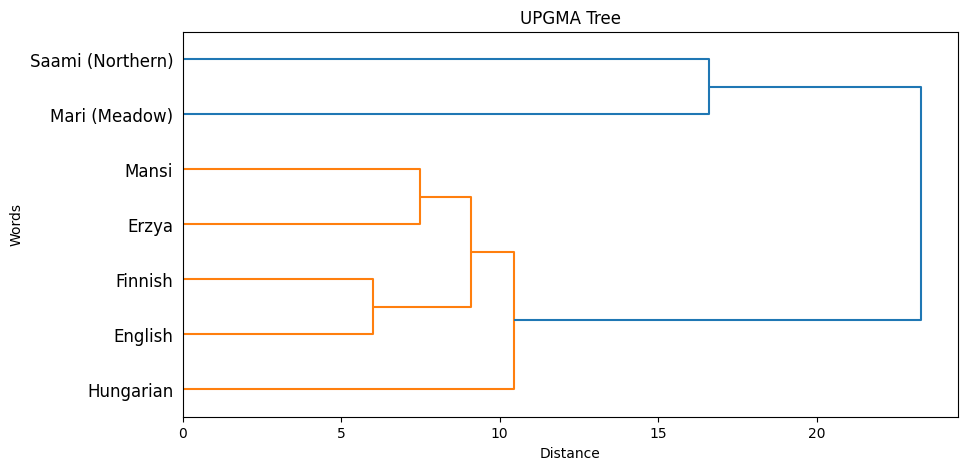

In [24]:
linkage_matrix = linkage(distance_matrix, method='average')

# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, labels=current_words, orientation='right')
plt.title("UPGMA Tree")
plt.xlabel("Distance")
plt.ylabel("Words")
plt.show()


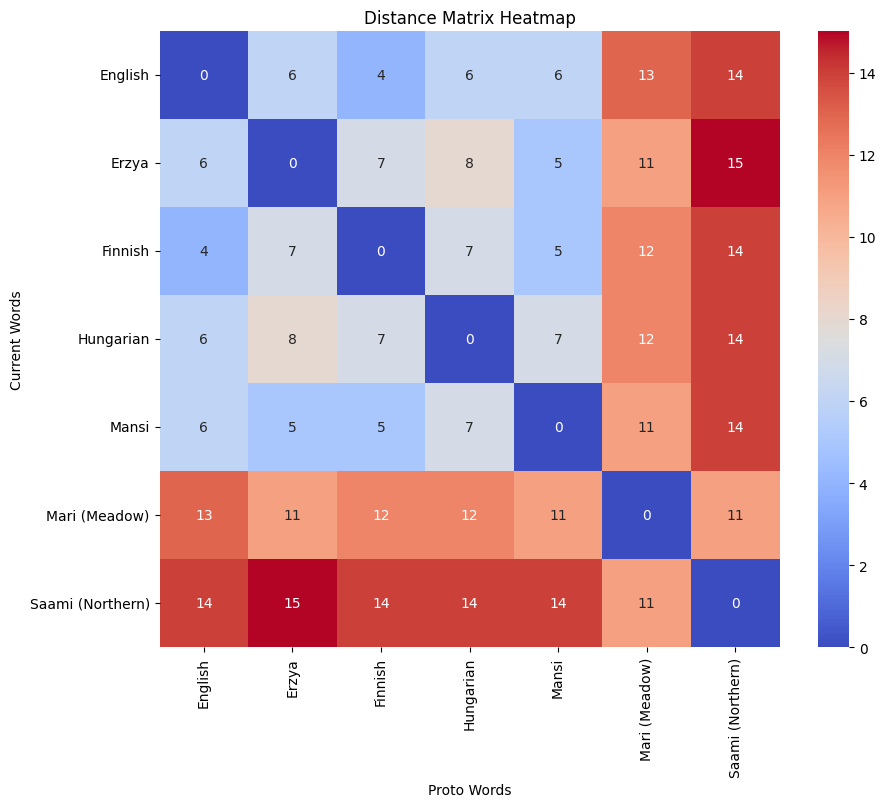

In [23]:
# Plot the distance matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(distance_df, cmap="coolwarm", annot=True, fmt=".0f")
plt.title("Distance Matrix Heatmap")
plt.xlabel("Proto Words")
plt.ylabel("Current Words")
plt.show()